Spam Email Detection using spam.csv

1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

2. Load Dataset

In [3]:
df = pd.read_csv("spam.csv", encoding="latin-1")

# Keep only useful columns
if 'v1' in df.columns and 'v2' in df.columns:
    df = df[['v1', 'v2']]
    df.columns = ['label', 'text']
elif 'text' in df.columns and 'spam' in df.columns:
    df = df[['text', 'spam']]

3. Data Preprocessing

In [4]:
if 'label' in df.columns:  # if labels are 'ham'/'spam'
    df['spam'] = df['label'].map({'ham': 0, 'spam': 1})
    df = df.drop(columns=['label'])

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)  
    text = text.translate(str.maketrans('', '', string.punctuation))  
    return text   # ❌ don’t remove stopwords


df['text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to C:\Users\Alwyn
[nltk_data]     Thomas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


 4. Train-Test Split

In [5]:
X = df['text']
y = df['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. Feature Extraction (TF-IDF)

In [6]:
vectorizer = TfidfVectorizer(ngram_range=(1,3))  # unigrams + bigrams
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

6. Train Logistic Regression Model

In [7]:
# LinearSVC with class balancing
model = LinearSVC(class_weight='balanced')
model.fit(X_train_vec, y_train)


LinearSVC(class_weight='balanced')

7. Evaluate Model

✅ Accuracy: 0.9865470852017937

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       952
           1       0.96      0.94      0.95       163

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



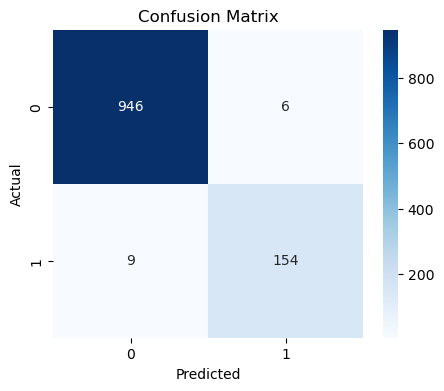

In [8]:
y_pred = model.predict(X_test_vec)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [12]:
sample = [
    "You are selected for the Contest",
    "Hey, are we still meeting today?",
    "You have a chance to become a millionaire",
]

sample_vec = vectorizer.transform(sample)
predictions = model.predict(sample_vec)

for msg, label in zip(sample, predictions):
    print(f"Message: {msg} -> Prediction: {'Spam' if label==1 else 'Ham'}")

Message: You are selected for the Contest -> Prediction: Spam
Message: Hey, are we still meeting today? -> Prediction: Ham
Message: You have a chance to become a millionaire -> Prediction: Spam
